# Life Expectancy and GDP Project

### Goals:

    - Prepare the data
    - Analyse the variables
    - Decide what to analyse
    - Decide what graphs to plot

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The dataset contains data for countries by year with their life expectancy and GDP values. 

### Preparing the dataset

In [23]:
df.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'}, inplace=True)
df.GDP = df.GDP / 1000000000
df.replace('United States of America', 'USA', inplace=True)
df.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


### Exploring the dataset

- The countries available are Chile, China, Germany, Mexico, USA and Zimbabwe
- The data ranges from 2000 to 2015
- GDP is in billions of dollars

### Questions

- Is life expectancy greater in developed countries?
- Are GDP and life expectancy associated?
- Has life expectancy increased over the years?
- Has GDP increased over the years? 
- What is the average life expectancy?
- What is the distribution of the life expectancy?

### 1. Is life expectancy greater in developed countries?

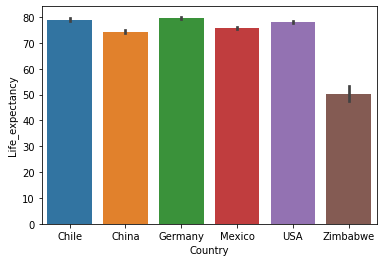

In [80]:
sns.barplot(data=df, x='Country', y='Life_expectancy')
plt.show()

From the graph it can be seen that Zimbabwe has a life expectancy of about 50 years, while the other countries average lays on about 75 years old. Except for Zimbabwe, the remaining countries are emergent or developed countries.

### 2. Are GDP and life expectancy associated?

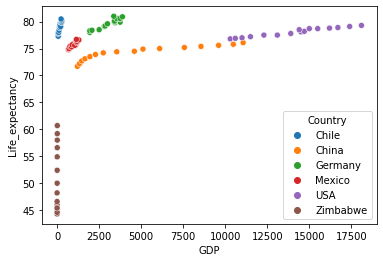

In [81]:
sns.scatterplot(x=df.GDP, y=df.Life_expectancy, hue=df.Country)
plt.show()

It seems like GDP and life expectancy have a positive relationship, but because the values for Zimbabwe's GDP haven't increased over the years and because the life expectancy is an outlier compared to the other countries, the countries will be analysed separately.

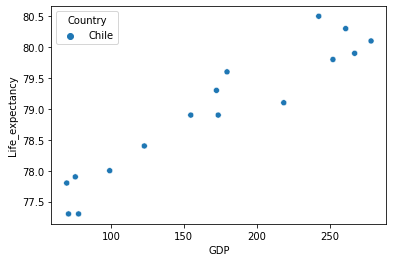

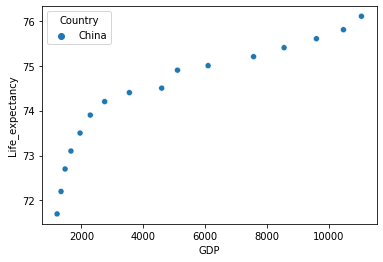

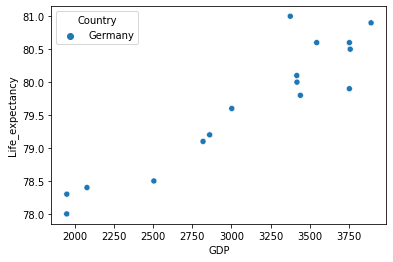

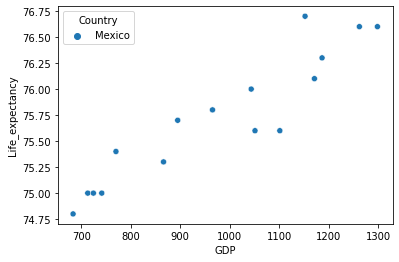

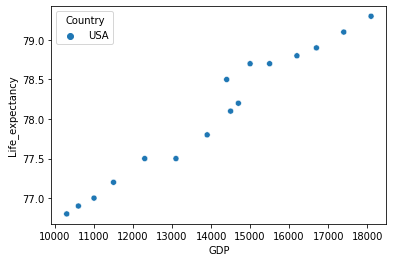

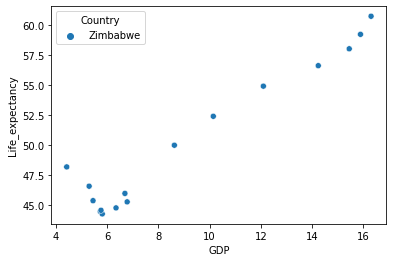

In [45]:
def scatter_by_country(df, country):
    df = df[df.Country == country]
    sns.scatterplot(x=df.GDP, y=df.Life_expectancy, hue=df.Country)
    plt.show()

for country in df.Country.unique():
    scatter_by_country(df, country)

From the graphs it can be seen that GDP and life expectancy have a positive correlation.
This means that the greatest the GDP, or the wealthiest the country, the greater the life expectancy.

### 3. Has life expectancy increased over the years?

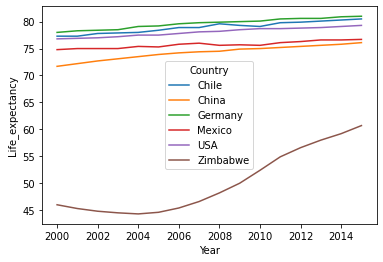

In [63]:
sns.lineplot(x=df.Year, y=df.Life_expectancy, hue=df.Country)
plt.show()

As expected, from the graph it can be seen that except for Zimbabwe, the life expectancy has been increasing over the years. This can be attributed to the advance of technology. In Zimbabwe, from 2000 to 2005 the life expectancy has decreased. This can imply that some unfortunate event happened on the country and had influence on the population.

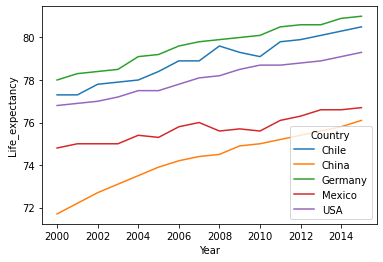

In [64]:
sns.lineplot(x=df.Year[df.Country != 'Zimbabwe'], y=df.Life_expectancy[df.Country != 'Zimbabwe'], hue=df.Country[df.Country != 'Zimbabwe'])
plt.show()

Isolating Zimbabwe from the analysis, it can be seen that the country that has the greatest life expectancy over the years is Germany and all countries have been increasing its life expectancy on average, while China seems to be increasing it faster than the others.

### 4. Has GDP increased over the years?

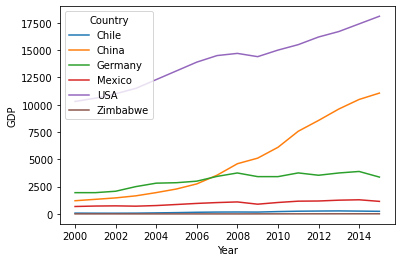

In [66]:
sns.lineplot(data=df, x=df.Year, y=df.GDP, hue=df.Country)
plt.show()

From the graph it can be seen that the GDP is increasing faster for China and USA over the years. USA had the greatest GDP compared to the other countries and China has grown faster from 2006.

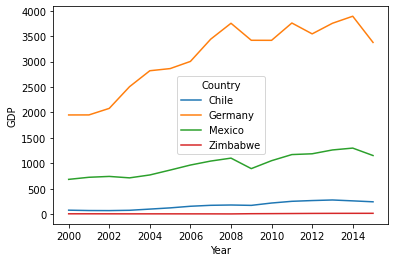

In [68]:
df_filtered = df[(df.Country != 'China') & (df.Country != 'USA')]
sns.lineplot(data=df_filtered, x=df_filtered.Year, y=df_filtered.GDP, hue=df_filtered.Country)
plt.show()

Excluding USA and China from the analysis, it can be seen that Chile and Zimbabwe have not grown as much as the other countries.

### 5. What is the average life expectancy?

In [70]:
df.Life_expectancy.mean()

72.78958333333334

In [72]:
df[df.Country != 'Zimbabwe'].Life_expectancy.mean()

77.32874999999999

The average life expecancy for all countries analysed is 73 years old. But as observed from the previous graphs, Zimbabwe has a life expectancy way smaller than the other countries, resulting in an average of 77 years old for the other countries alone.

### 6. What is the distribution of the life expectancy?

<AxesSubplot:xlabel='Life_expectancy', ylabel='Density'>

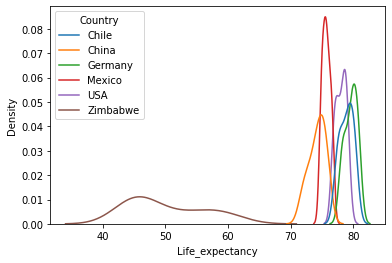

In [75]:
sns.kdeplot(data=df, x=df.Life_expectancy, hue=df.Country)

From the graph it can be seen that the whole distribution for Zimbabwe lays on the left of the other coutries' distributions. This means that the life expectancy in Zimbabwe is smaller than the smallest life expectancy of the other countries (around 70 years old). 

<AxesSubplot:xlabel='Life_expectancy', ylabel='Density'>

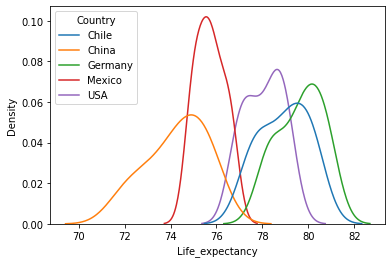

In [76]:
sns.kdeplot(data=df[df.Country != 'Zimbabwe'], x=df[df.Country != 'Zimbabwe'].Life_expectancy, hue=df[df.Country != 'Zimbabwe'].Country)

Exluding Zimbabwe from the analysis, it can be seen that China and Mexico concentrate the life expectancy on around 75 years old, with Mexico having a great peak on 76 years old. The remaining countries lay on around 80 years old, with USA having a multimodal distribution, with one peak on 77 and another greater peak on 79 years old. Germany and Chile have similar behaviors, with a smaller peak on around 78 years old and a greater one on around 80 years old. From all countries, Germany seems to have the greatest life expectancy.

<AxesSubplot:xlabel='Country', ylabel='Life_expectancy'>

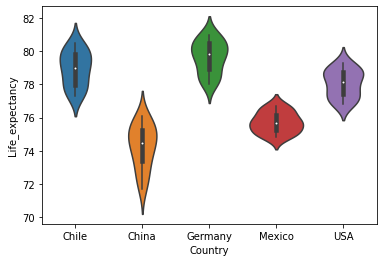

In [79]:
sns.violinplot(x=df[df.Country != 'Zimbabwe'].Country, y=df[df.Country != 'Zimbabwe'].Life_expectancy)

When analysing the violin plot, it can be seen that Mexico has the smallest range and China has the widest distribution. Chile and Germany have similar distributions and have the greater life expectancies of all countries analysed. 